<a href="https://colab.research.google.com/github/PRIMETECH-DESIGNS-LTD/zambia-vision2030-etd-unza25-csc4792_group_1/blob/main/notebooks/etd_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div align="center">
  <img src="https://th.bing.com/th/id/OIP.aZt5o1S31YdVKWcrxIBK0gHaKH?w=200&h=200&c=10&o=6&pid=genserp&rm=2" alt="Zambia Vision 2030 Logo" width="150">
</div>

<div align="center">
    <h1>ZAMBIA VISION 2030 ETD CLASSIFIER</h1>
    <h3 style="color:blue;"><i>UNZA CSC 4792 (2024/25) - Group Project | Department of Computer Science and Informatics</i><h3>
</div>

---

## **1. Business Understanding**

### **1.1 Problem Statement**
Zambia’s Vision 2030 aims to transform the nation into a prosperous middle-income economy through sectoral
development. However, tracking progress is hindered by:
- **Fragmented data**: Emerging and Transformative Developments (*ETDs*) are siloed across
government portals, reports, and international databases.
- **Manual classification:** Current sector tagging of ETDs (e.g., agriculture, mining, ICT) is
inconsistent, delaying policy adjustments.
- **Limited visibility:** Policymakers lack a unified view of ETD distribution across Vision 2030’s 12
priority sectors.

### **1.2 Business Objectives**
- Automate ETD classification with ≥90% accuracy
- Identify underfunded sectors through cluster analysis
- Develop public dashboard for transparency

### **1.3 Data Mining Goals**

**Classification Accuracy**  
  - Achieve a macro average F1-score of ≥ 0.85 for the automated sector classification model.  
  - Validated through 10-fold cross-validation on held-out test data.  

**Cluster Interpretability**  
  - Attain a Silhouette Score of ≥ 0.6 for unsupervised clustering of ETDs.  
  - Clusters must be at least 80% interpretable by domain experts in relation to Vision 2030 sectors.  

**Policy Relevance**  
  - Ensure ≥ 90% of classified sectors align with Zambia’s Eighth *National Development Plan* (8NDP) priorities.  
  - Verified through manual review by Ministry of Finance experts.  

**Operational Efficiency**  
  - Reduce manual tagging time by at least 70% compared to current processes.  
  - Measured using a time-motion study.  

**Dashboard Performance**  
  - Ensure public-facing dashboard loads in ≤ 2 seconds under standard network conditions.  
  - Measured through automated performance testing.  

### **1.4 Success Criteria**

- **Classification Accuracy**  
  - Achieve a macro average F1-score of ≥ 0.85 for the automated sector classification model.  
  - Validated through 10-fold cross-validation on held-out test data.  

- **Cluster Interpretability**  
  - Attain a Silhouette Score of ≥ 0.6 for unsupervised clustering of ETDs.  
  - Clusters must be at least 80% interpretable by domain experts in relation to Vision 2030 sectors.  

- **Policy Relevance**  
  - Ensure ≥ 90% of classified sectors align with Zambia’s Eighth National Development Plan (8NDP) priorities.  
  - Verified through manual review by Ministry of Finance experts.  

- **Operational Efficiency**  
  - Reduce manual tagging time by at least 70% compared to current processes.  
  - Measured using a time-motion study.  

- **Dashboard Performance**  
  - Ensure public-facing dashboard loads in ≤ 2 seconds under standard network conditions.  
  - Measured through automated performance testing.  
### **1.5 Data Sources**

#### **Primary Data Sources**
- **Zambia Development Agency (ZDA) API**  
  - *Content*: Structured records of ETDs (projects, investments, and initiatives).  
  - *Use Case*: Training data for sector classification and validation against official sector tags.  

- **World Bank Projects Database**  
  - *Content*: Detailed project descriptions, funding amounts, and implementation reports.  
  - *Use Case*: Cross-reference sector labels and augment training data with international standards.  

- **8th National Development Plan (8NDP) PDF**  
  - *Content*: Policy priorities, sector budgets, and performance indicators.  
  - *Use Case*: Ground-truth alignment for model validation and gap analysis.  

#### **Secondary/Supporting Data Sources**  
- **Ministry of Finance Sector Budgets (Excel/PDF)**  
  - *Content*: Annual expenditure allocations per Vision 2030 sector.  
  - *Use Case*: Quantify underfunded sectors via cluster-model discrepancies.  

- **Zambia Climate Change Secretariat Reports**  
  - *Content*: Climate-related ETDs (e.g., renewable energy projects).  
  - *Use Case*: Resolve ambiguity in Energy/Environment sector classification.  

- **African Development Bank (AfDB) Project Portal**  
  - *Content*: Pan-African development project metadata.  
  - *Use Case*: Enrich ETD diversity for robust model training.  

- **UN ISIC 4.0 Codebook**  
  - *Content*: International standard for sector classification.  
  - *Use Case*: Harmonize Zambia’s sector tags with global benchmarks.  

#### **Data Source Map**  
| Source Type       | Example Data                          | Relevance to Goals                     |  
|--------------------|---------------------------------------|----------------------------------------|  
| **Structured**    | ZDA API, World Bank JSON              | Supervised learning inputs             |  
| **Unstructured**  | 8NDP PDFs, AfDB reports               | Text mining for latent themes         |  
| **Validation**    | MoF budgets, ISIC codes               | Policy alignment and model auditing    |  

# 2. Data Understanding

### 2.1 Data loading into Pandas dataframes


In [23]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import re

from google.colab import drive
drive.mount('/content/drive')

# Google Drive
base_dir = "/content/drive/My Drive/zambia-vision2030-etd-unza25-csc4792_group_1/data/processed"

# Full paths to cleaned CSV files
wb_csv = f"{base_dir}/worldbank_projects_cleaned.csv"
vision_csv = f"{base_dir}/Zambian_Vision_2030_Projects_cleaned.csv"
ndp8_csv = f"{base_dir}/8th_ndp_cleaned.csv"

# Load dataframes
df_wb = pd.read_csv(wb_csv, sep='|') if os.path.exists(wb_csv) else None
df_v2030 = pd.read_csv(vision_csv, sep='|') if os.path.exists(vision_csv) else None
df_ndp8 = pd.read_csv(ndp8_csv, sep='|') if os.path.exists(ndp8_csv) else None

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
# Clean column names
df_wb.columns = df_wb.columns.str.strip()

# Fix malformed JSON in sector_namecode
def parse_json_like(x):
    if not isinstance(x, str) or x.strip() == '': return []
    try:
        x = re.sub(r"'", '"', x)
        x = re.sub(r',\s*}', '}', x)
        x = re.sub(r',\s*]', ']', x)
        return json.loads(x)
    except:
        return []

# Extract sector names
if 'sector_namecode' in df_wb.columns:
    df_wb['sectors'] = df_wb['sector_namecode'].apply(parse_json_like).apply(
        lambda x: [i.get('Name', i.get('name', '')) for i in x if isinstance(i, dict)]
    )
else:
    df_wb['sectors'] = [[] for _ in range(len(df_wb))]

# Clean numeric columns
df_wb['total_commitment_usd'] = pd.to_numeric(
    df_wb['total_commitment_usd'].astype(str).str.replace(',', ''),
    errors='coerce'
)

# Parse dates
df_wb['approval_date'] = pd.to_datetime(df_wb['approval_date'], errors='coerce')
df_wb['approval_year'] = df_wb['approval_date'].dt.year

# Clean Vision 2030 data
df_v2030.dropna(inplace=True)
df_v2030['Sector'] = df_v2030['Sector'].str.strip()
df_v2030['Target_Year'] = pd.to_numeric(df_v2030['Target_Year'], errors='coerce')

print(" All datasets loaded and cleaned.")

 All datasets loaded and cleaned.


### 2.2 Performing initial data exploration

In [9]:
print("=== World Bank Projects (Sample) ===")
print(df_wb[['project_id', 'project_name', 'total_commitment_usd', 'approval_year', 'status']].head())

print("\n=== Vision 2030 Objectives (Sample) ===")
print(df_v2030.head())

=== World Bank Projects (Sample) ===
  project_id                                       project_name  \
0    P507116  First Zambia Climate and Economic Resilience P...   
1    P503941  Zambia Refugee and Host Communities Project - ...   
2    P181711  Second Additional Financing for Scaling-up Sho...   
3    P505188  Zambia Health Emergency Preparedness, Response...   
4    P181391  Girls' Education and Women's Empowerment and L...   

   total_commitment_usd  approval_year  status  
0                   0.0         2024.0  Active  
1                   0.0         2024.0  Active  
2                 207.6         2024.0  Active  
3                  50.0         2024.0  Active  
4                 157.0         2024.0  Active  

=== Vision 2030 Objectives (Sample) ===
                         Sector  \
0   Agriculture & Food Security   
1   Mining & Mineral Processing   
2  Energy & Renewable Resources   
3         ICT & Digital Economy   
4            Tourism & Wildlife   

              

In [31]:
print("\n================ World Bank Info ================")
df_wb.info()
print("===================================================")

print("\n================ Vision 2030 Info =================")
df_v2030.info()
print("===================================================")


================ World Bank Info ================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   project_id            169 non-null    object             
 1   project_name          169 non-null    object             
 2   status                169 non-null    object             
 3   total_commitment_usd  169 non-null    float64            
 4   approval_date         141 non-null    datetime64[ns, UTC]
 5   end_date              129 non-null    object             
 6   sector                169 non-null    object             
 7   theme                 169 non-null    object             
 8   borrower              0 non-null      float64            
 9   implementing_agency   0 non-null      float64            
 10  country               169 non-null    object             
 11  project_url         

In [36]:
print("=========== Numerical Summary ============")
print(df_wb[['total_commitment_usd', 'approval_year']].describe())
print("==========================================")

=========== Numerical Summary ============
       total_commitment_usd  approval_year
count            169.000000     141.000000
mean              48.514388    1997.255319
std               64.816957      18.009285
min                0.000000    1953.000000
25%                7.100000    1983.000000
50%               21.000000    1999.000000
75%               52.000000    2012.000000
max              300.000000    2024.000000


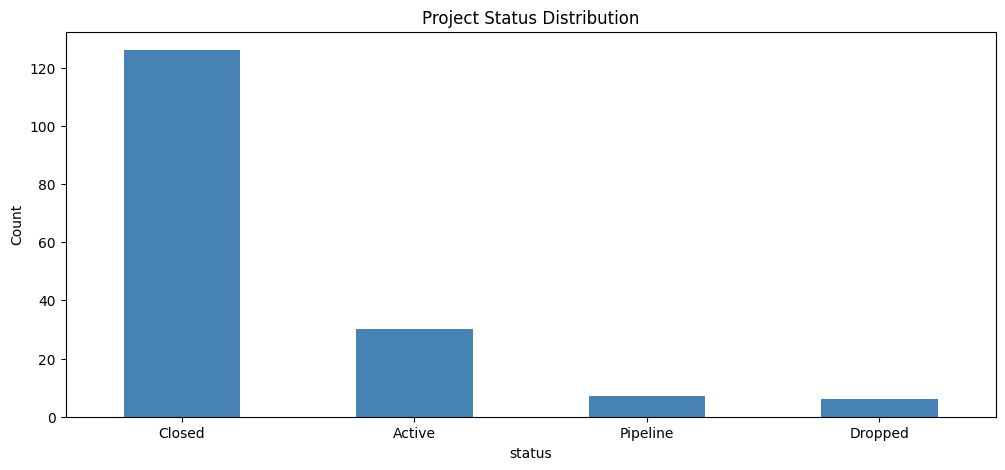

In [41]:
plt.figure(figsize=(12, 5))
df_wb['status'].value_counts().plot(kind='bar', color='steelblue')
plt.title('Project Status Distribution')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

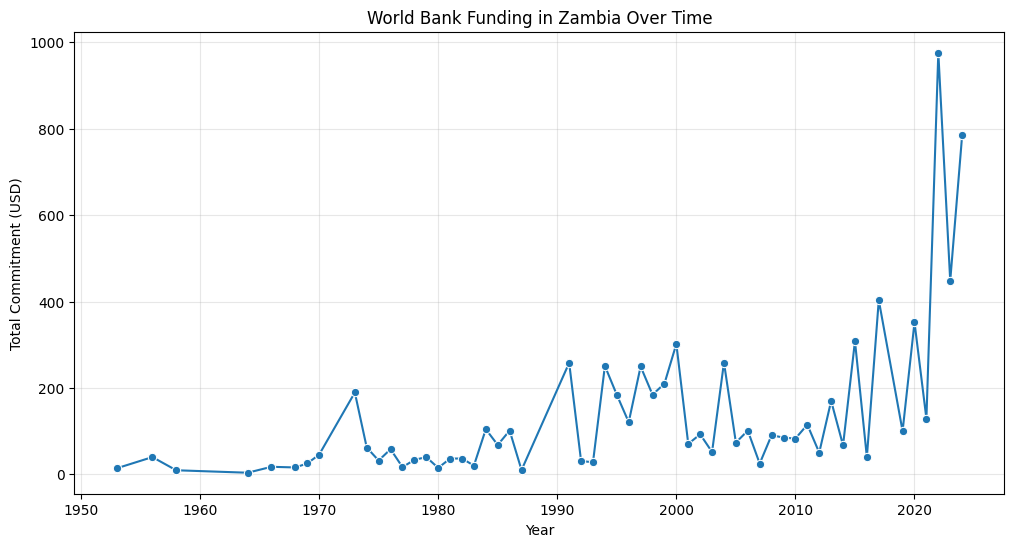

In [38]:
funding_by_year = df_wb.groupby('approval_year')['total_commitment_usd'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=funding_by_year.index, y=funding_by_year.values, marker='o')
plt.title('World Bank Funding in Zambia Over Time')
plt.xlabel('Year')
plt.ylabel('Total Commitment (USD)')
plt.grid(True, alpha=0.3)
plt.show()

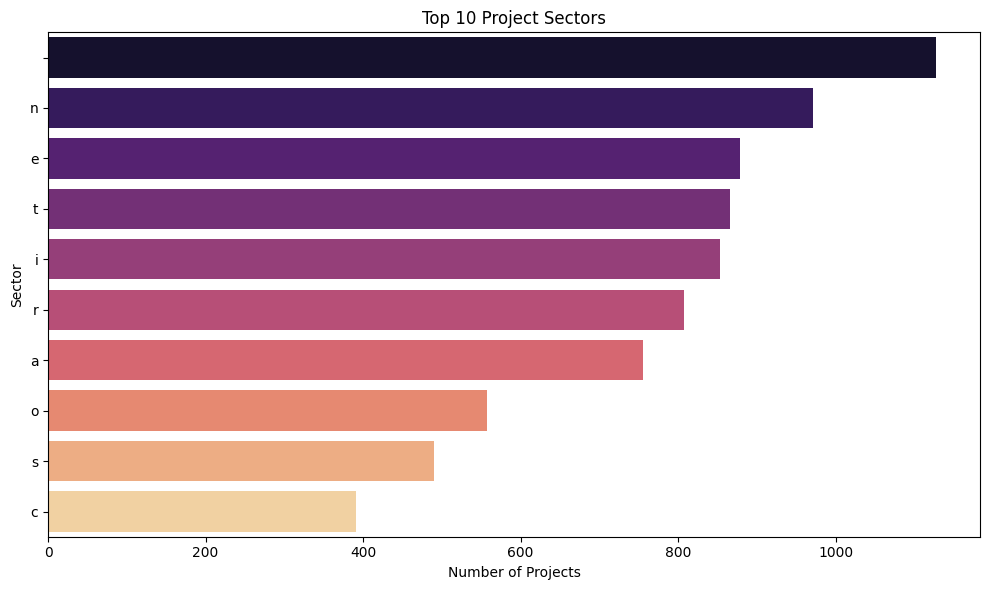

In [21]:
from collections import Counter

all_sectors = []
for s in df_wb['sector']:
    all_sectors.extend([sec for sec in s if sec])

sector_counts = Counter(all_sectors)
top_sectors = dict(sector_counts.most_common(10))

# Create a DataFrame for seaborn
sector_df = pd.DataFrame({
    'Sector': list(top_sectors.keys()),
    'Count': list(top_sectors.values())
})

plt.figure(figsize=(10, 6))
sns.barplot(data=sector_df, x='Count', y='Sector',
            hue='Sector',
            palette='magma',
            legend=False,
            dodge=False)

plt.title('Top 10 Project Sectors')
plt.xlabel('Number of Projects')
plt.ylabel('Sector')
plt.tight_layout()
plt.show()